In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Performing Label Encoding on the gender column

In [6]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

In [7]:
df['Gender'] = lbl.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Visualizing the dataset

[]

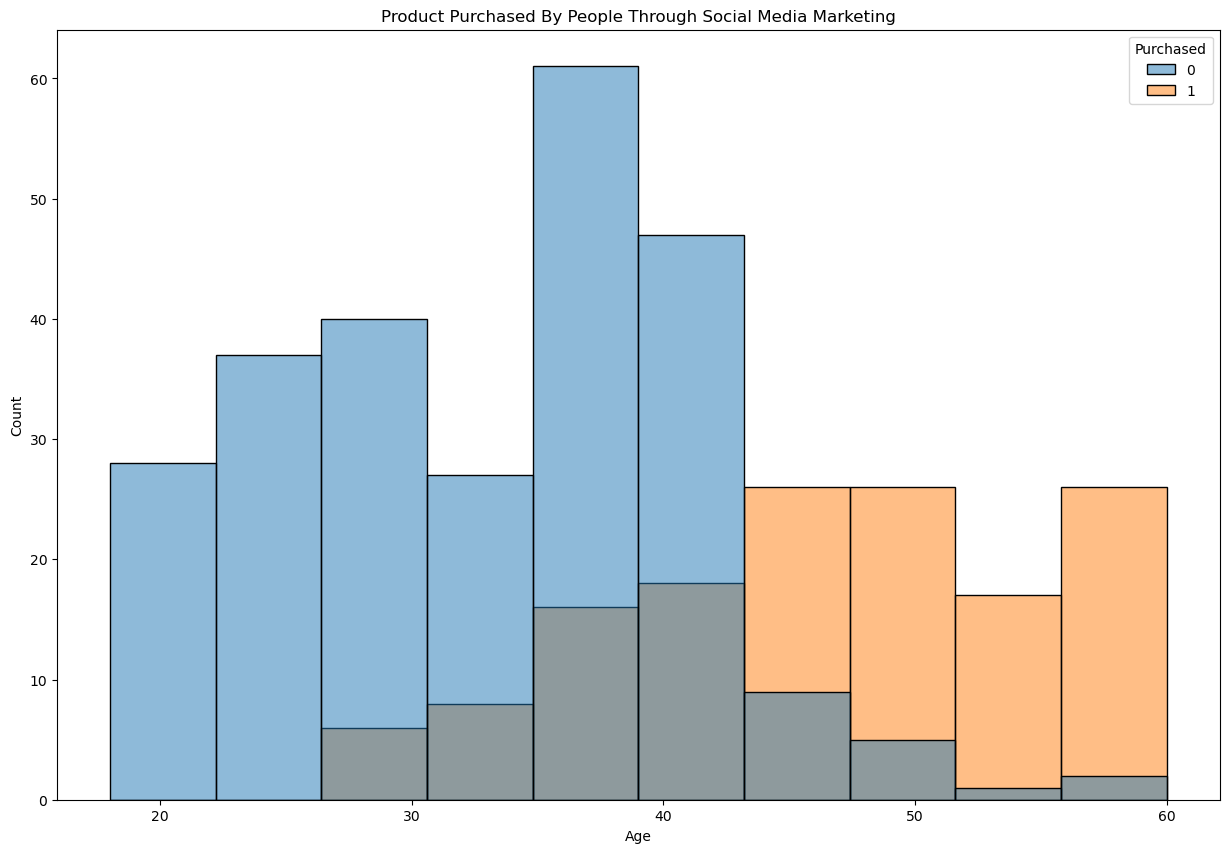

In [8]:
plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x=df['Age'], hue=df['Purchased'], data=df)
plt.plot()

[]

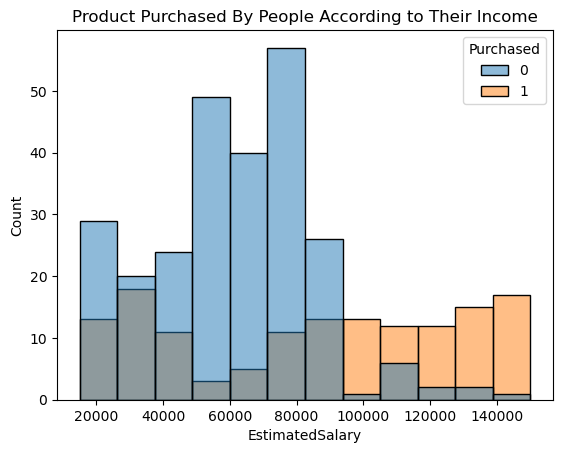

In [9]:
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x=df['EstimatedSalary'], hue=df['Purchased'], data=df)
plt.plot()

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
X = df.drop(['User ID', 'Purchased'], axis='columns')
y = df['Purchased']

In [12]:
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fitting classifier to the Training set

In [14]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [15]:
model.score(X_test, y_test)

0.93

In [16]:
y_pred = model.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)

[]

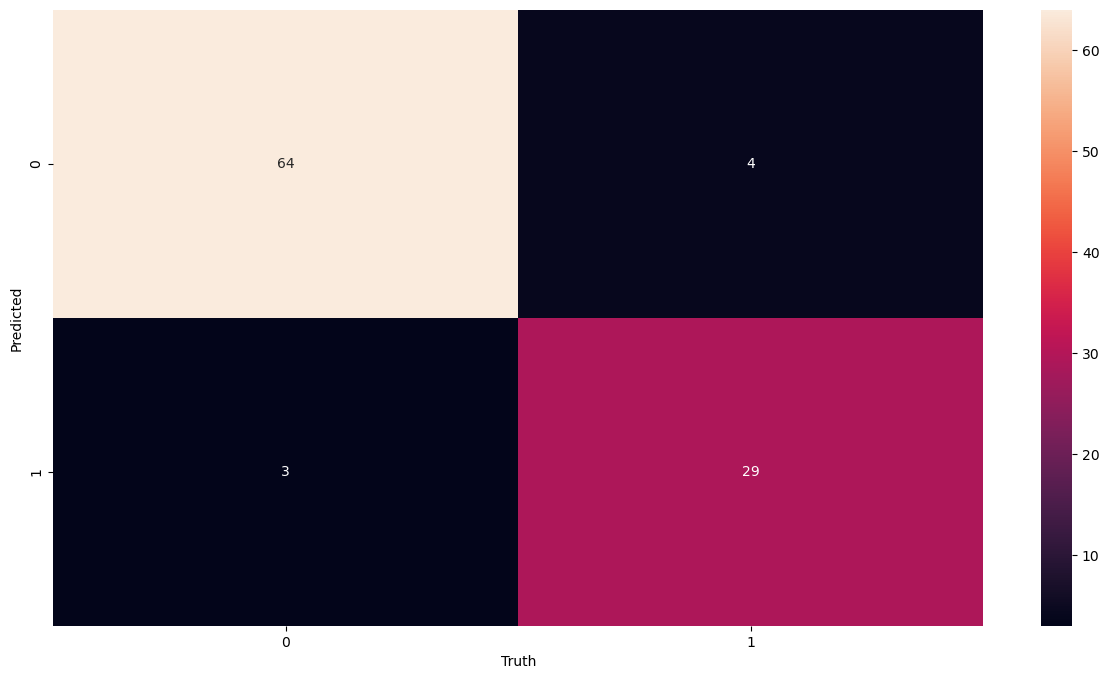

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

